![](https://www.ieseg.fr/wp-content/uploads/IESEG-Logo-2012-rgb.jpg)

## CREDIT SCORING INDIVIDUAL ASSIGNMENT - SURVIVAL ANALYSIS
## STUDENT - NITHESH RAMANNA

# Survival Analysis
Survival analysis is a branch of statistics for analyzing the expected duration of time until one event occurs, such as death in biological organisms and failure in mechanical systems. This topic is called reliability theory or reliability analysis in engineering, duration analysis or duration modelling in economics, and event history analysis in sociology. 
https://en.wikipedia.org/wiki/Survival_analysis

In [1]:
import lifelines # pip install lifelines
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

C:\tools\Anaconda3\envs\py\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\tools\Anaconda3\envs\py\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\tools\Anaconda3\envs\py\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# load dataset
data_surv = pd.read_csv('./Assignment2022_Data/mortgage.csv')

In [3]:
len(data_surv)

622489

In [4]:
data_surv.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [5]:
data_surv.isna().sum()

id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
balance_time                 0
LTV_time                   270
interest_rate_time           0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_time                  0
dtype: int64

## Data Preprocessing

In [6]:
# Handling Missing values by Filling them with NA
data_surv['LTV_time'] = data_surv.LTV_time.fillna(data_surv.LTV_time.mean())

In [7]:
# convert episodic data to static
data_static = data_surv.groupby("id").agg(np.max).reset_index()

In [8]:
data_static.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,48,-7,25,113,41303.42,28.963629,9.200,226.29,3.029499,...,1,0,45000.0,715,69.4,9.200,87.03,1,0,1
1,2,26,18,25,138,105826.38,65.469851,7.680,226.29,2.899137,...,1,0,107200.0,558,80.0,7.680,186.91,0,1,2
2,3,29,-6,25,114,44866.18,31.459735,11.375,226.29,2.899137,...,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
3,4,60,-2,25,119,61031.10,49.156858,11.000,226.29,3.029499,...,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
4,5,27,18,25,138,52295.07,66.346343,9.155,226.29,2.899137,...,1,0,52800.0,527,80.0,9.155,186.91,0,1,2


In [9]:
len(data_static)

50000

In [10]:
# Checking the 30th Quantile of Balance at Origin Time

data_static['balance_orig_time'].quantile(0.3)
data_static['Low_balance'] = 1
data_static.loc[(data_static['balance_orig_time'] > data_static['balance_orig_time'].quantile(0.3)),'Low_balance'] = 0

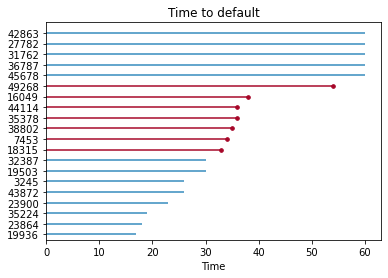

In [11]:
from lifelines.plotting import plot_lifetimes

df_samp = data_static.sample(20)
ax = plot_lifetimes(df_samp["time"], event_observed=df_samp["default_time"])
ax.set_xlabel("Time")
ax.set_title("Time to default")
plt.show()

## Kaplan Meier Estimator
The Kaplan–Meier estimator, also known as the product limit estimator, is a non-parametric statistic used to estimate the survival function from lifetime data.

A plot of the Kaplan–Meier estimator is a series of declining horizontal steps which, with a large enough sample size, approaches the true survival function for that population. The value of the survival function between successive distinct sampled observations ("clicks") is assumed to be constant.

References: https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator

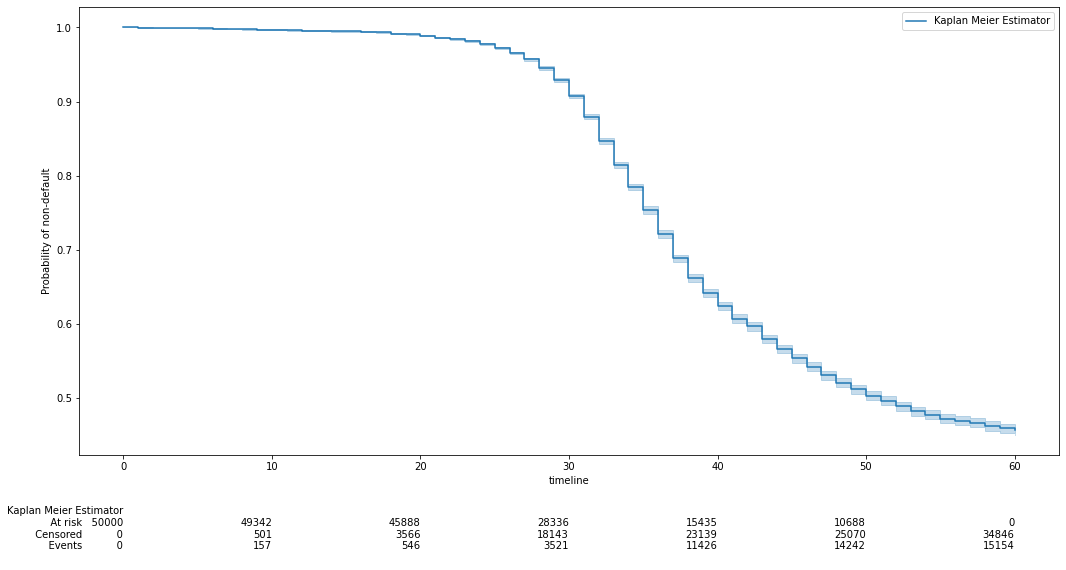

In [12]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
# fit on static data: TIME indicates the last observed timestep, TARGET indicates whether the customer defaulted
kmf.fit(data_static['time'], data_static['default_time'], label='Kaplan Meier Estimator')


# plot survival function
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(15,8))
ax.set_ylabel('Probability of non-default')
plt.show()

35.0


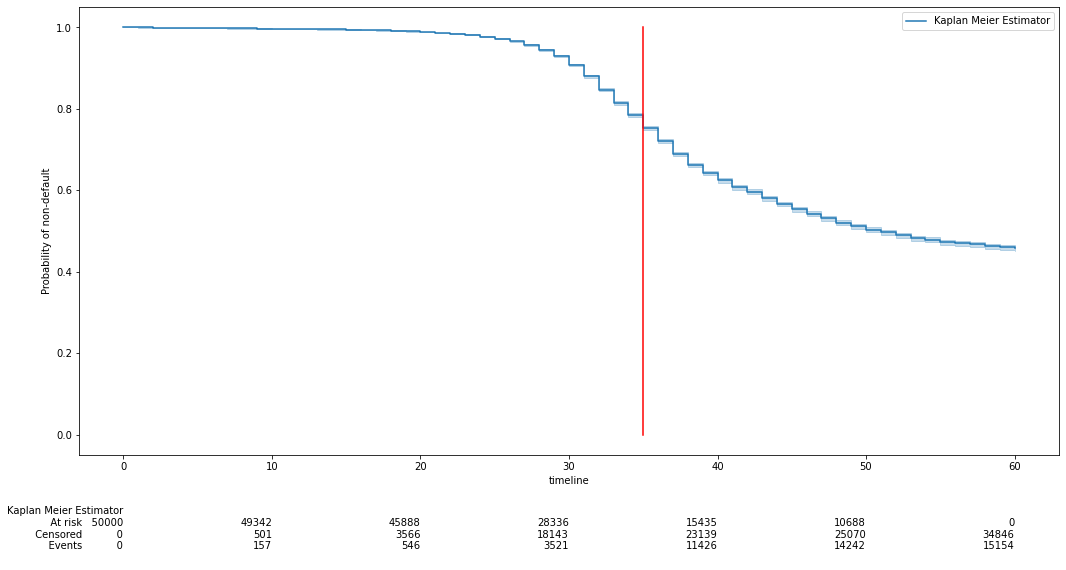

In [13]:
# Median default_time?
median_default = data_static.query("default_time==1")["time"].median()
print(median_default)

# add to plot
ax = kmf.plot_survival_function(at_risk_counts=True,figsize=(15,8))
ax.set_ylabel('Probability of non-default')
plt.plot([median_default, median_default], [0,1], 'k-', c="red")
plt.show()

In [14]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,50000,50000
1.0,22,3,19,0,50000
2.0,37,5,32,0,49978
3.0,57,14,43,0,49941
4.0,56,25,31,0,49884
...,...,...,...,...,...
56.0,223,58,165,0,8996
57.0,231,49,182,0,8773
58.0,245,77,168,0,8542


<AxesSubplot:xlabel='timeline'>

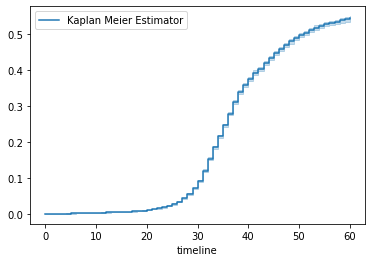

In [15]:
# plot cumulative hazard function
kmf.plot_cumulative_density()

In [16]:
# "predict" probability to default at time 60

# 1 - probability of non-default at time 60
1 - kmf.predict(25)

0.027535396793506917

In [17]:
1 - kmf.predict(50)

0.49651115609746754

<AxesSubplot:ylabel='Low_balance'>

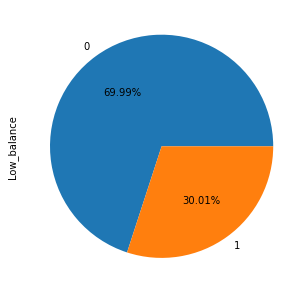

In [18]:
# display pie chart low balance
data_static["Low_balance"].value_counts().plot.pie(autopct='%.2f%%', figsize=(5,8))

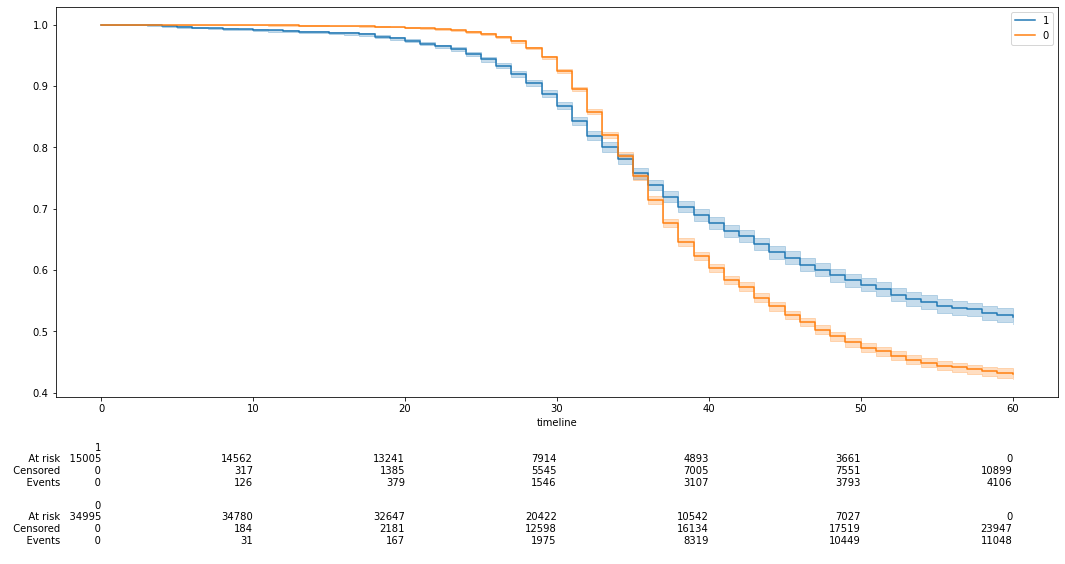

In [19]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(15,8))

# subset data
df1 = data_static.loc[data_static["Low_balance"] == 1,:]
df2 = data_static.loc[data_static["Low_balance"] == 0,:]

# fit subset gender = male
ax = kmf1.fit(df1['time'], df1['default_time'], label='1').plot_survival_function(ax=ax)

# fit subset gender = female
ax = kmf2.fit(df2['time'], df2['default_time'], label='0').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

## Logrank test
The logrank test, or log-rank test, is a hypothesis test to compare the survival distributions of two samples. It is a nonparametric test and appropriate to use when the data are right skewed and censored (technically, the censoring must be non-informative) https://en.wikipedia.org/wiki/Logrank_test

The logrank test statistic compares estimates of the hazard functions of the two groups at each observed event time. It is constructed by computing the observed and expected number of events in one of the groups at each observed event time and then adding these to obtain an overall summary across all-time points where there is an event.

In [20]:
# Perform logrank test to assess whether there is a difference between Males and Females in time to default

from lifelines.statistics import logrank_test

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df1['time'], df2['time'], event_observed_A=df1['default_time'],event_observed_B=df2['default_time'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,58.657144,1.876854e-14,45.598677


Since the p value is <0.05 we can reject the null hypothesis which means there is a difference between 2 groups

# Cox Proportional Hazarmode for varying variables
The cox proportional-hazards model is one of the most important methods used for modelling survival analysis data
The purpose of the model is to evaluate simultaneously the effect of several factors on survival. In other words, it allows us to examine how specified factors influence the rate of a particular event happening (e.g., infection, death) at a particular point in time. This rate is commonly referred as the hazard rate. Predictor variables (or factors) are usually termed covariates in the survival-analysis literature.

The Cox model is expressed by the hazard function denoted by h(t). Briefly, the hazard function can be interpreted as the risk of dying at time t. It can be estimated as follow:

h(t)=h0(t)×exp(b1x1+b2x2+...+bpxp)

where,
t represents the survival time
h(t) is the hazard function determined by a set of p covariates (x1,x2,...,xp)
the coefficients (b1,b2,...,bp) measure the impact (i.e., the effect size) of covariates.
the term h0 is called the baseline hazard. It corresponds to the value of the hazard if all the xi are equal to zero (the quantity exp(0) equals 1). The ‘t’ in h(t) reminds us that the hazard may vary over time.

The quantities exp(bi) are called hazard ratios (HR). A value of bi greater than zero, or equivalently a hazard ratio greater than one, indicates that as the value of the ith covariate increases, the event hazard increases and thus the length of survival decreases.

In summary,

HR = 1: No effect
HR < 1: Reduction in the hazard
HR > 1: Increase in Hazard
http://www.sthda.com/english/wiki/cox-proportional-hazards-model

In [21]:
# select variables used in previous model + time varying variables
data_tv = pd.merge(data_surv[["id", "time", "default_time", "hpi_time", "gdp_time", "uer_time", "balance_time",
"interest_rate_time", "FICO_orig_time", "LTV_time"]], data_static[["id", "time"]]\
.rename(columns={"time":"time_end"}), on="id", how="inner")

# Assumption: time always starts at 0 (no interval censored data)
data_tv["first_time"] = 0

In [22]:
from lifelines import CoxTimeVaryingFitter

# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(data_tv, id_col="id", event_col="default_time", start_col="first_time", stop_col="time_end", show_progress=True)
ctv.summary

Iteration 8: norm_delta = 0.00001, step_size = 1.00000, ll = -192581.15265, newton_decrement = 0.00000, seconds_since_start = 46.9Convergence completed after 8 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
time,-5.304219e-02,0.948340,1.240797e-03,-5.547411e-02,-5.061027e-02,0.946037,0.950649,0.0,-42.748474,0.000000e+00,inf
hpi_time,-1.493606e-02,0.985175,5.855678e-04,-1.608375e-02,-1.378837e-02,0.984045,0.986306,0.0,-25.506970,1.649772e-143,474.313451
gdp_time,-1.726084e-02,0.982887,4.074025e-03,-2.524578e-02,-9.275893e-03,0.975070,0.990767,0.0,-4.236801,2.267265e-05,15.428687
uer_time,-8.018080e-02,0.922949,7.544854e-03,-9.496844e-02,-6.539316e-02,0.909402,0.936699,0.0,-10.627217,2.226574e-26,85.215305
balance_time,5.499832e-07,1.000001,2.250246e-08,5.058792e-07,5.940873e-07,1.000001,1.000001,0.0,24.441024,6.269418e-132,435.846177
interest_rate_time,1.403192e-01,1.150641,3.918051e-03,1.326399e-01,1.479984e-01,1.141839,1.159511,0.0,35.813517,6.804017e-281,930.695408
FICO_orig_time,-4.845199e-03,0.995167,1.238280e-04,-5.087897e-03,-4.602500e-03,0.994925,0.995408,0.0,-39.128469,0.000000e+00,inf
LTV_time,8.384300e-03,1.008420,1.331929e-04,8.123246e-03,8.645353e-03,1.008156,1.008683,0.0,62.948535,0.000000e+00,inf


<AxesSubplot:xlabel='log(HR) (95% CI)'>

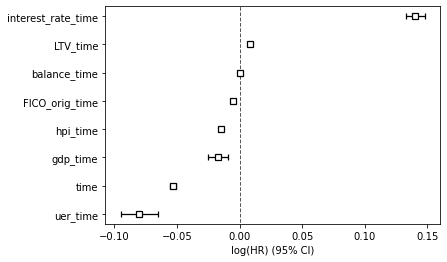

In [23]:
ctv.plot()

In [24]:
# inspect p-values
round(ctv.summary['p'], 8)

covariate
time                  0.000000
hpi_time              0.000000
gdp_time              0.000023
uer_time              0.000000
balance_time          0.000000
interest_rate_time    0.000000
FICO_orig_time        0.000000
LTV_time              0.000000
Name: p, dtype: float64

<AxesSubplot:>

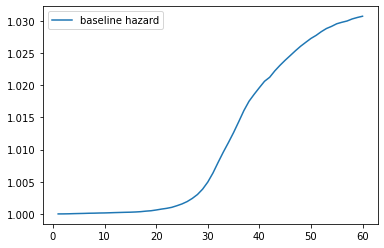

In [25]:
np.exp(ctv.baseline_cumulative_hazard_).plot()

In [26]:
# print parameter values
print(round(ctv.params_, 6))

covariate
time                 -0.053042
hpi_time             -0.014936
gdp_time             -0.017261
uer_time             -0.080181
balance_time          0.000001
interest_rate_time    0.140319
FICO_orig_time       -0.004845
LTV_time              0.008384
dtype: float64


In [27]:
# Interpretation (under ceteris paribus assumption): 
print('\n An additional increase in outstanding balance increases the probability of default by {:.3f}%'.format((np.exp(0.000001) - 1)*100))
print('\n An additional increase in interest_rate_time increases the probability of default by {:.3f}%'.format((np.exp(0.140319) - 1)*100))
print('\n An additional increase in unemployment rate increases the probability of default by {:.3f}%'.format((np.exp(-0.080181) - 1)*100))
print('\n An additional increase in GDP increases the probability of default by {:.3f}%'.format((np.exp(-0.017261) - 1)*100))


 An additional increase in outstanding balance increases the probability of default by 0.000%

 An additional increase in interest_rate_time increases the probability of default by 15.064%

 An additional increase in unemployment rate increases the probability of default by -7.705%

 An additional increase in GDP increases the probability of default by -1.711%


## Reference
    Professor's study material